# Problem Statement 2:

In [1]:
# An online retail store is trying to understand the various customer purchase patterns for their
# firm, you are required to give enough evidence based insights to provide the same.

# Dataset Information:
# The online_retail.csv contains 387961 rows and 8 columns.

# 1. Using the above data, find useful insights about the customer purchasing history
# that can be an added advantage for the online retailer.
# 2. Segment the customers based on their purchasing behavior.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r"C:\Users\hp\Downloads\OnlineRetail (3).csv",encoding ='unicode_escape')

In [6]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
# lets first check the shape of our given dataset

In [8]:
df.shape

(541909, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
# lets now check if our data contains any null values

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
# lets separate InvoiceDate to Date and Time column

In [13]:
df[["Date","Time"]] = df.InvoiceDate.str.split(" ",expand = True)

In [14]:
df = df.drop(columns = ["InvoiceDate"])


In [15]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,12/1/2010,8:26
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,12/1/2010,8:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,12/1/2010,8:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,12/1/2010,8:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,12/1/2010,8:26
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,12/9/2011,12:50
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12/9/2011,12:50
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,12/9/2011,12:50
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,12/9/2011,12:50


In [16]:
# convert the date column to a datetime format

In [17]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

In [18]:
# create bins for the date column
bins = [0, 6, 12, 18, 24]
labels = ['Midnight-6am', '6am-12pm', '12pm-6pm', '6pm-Midnight']
df['Time'] = pd.cut(df['Time'], bins=bins, labels=labels)

In [19]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,12/1/2010,6am-12pm
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,12/1/2010,6am-12pm
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,12/1/2010,6am-12pm
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,12/1/2010,6am-12pm
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,12/1/2010,6am-12pm
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,12/9/2011,6am-12pm
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12/9/2011,6am-12pm
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,12/9/2011,6am-12pm
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,12/9/2011,6am-12pm


In [20]:
# we have converted the time to 4 intervels that is: 
df["Time"].value_counts()

12pm-6pm        308248
6am-12pm        229044
6pm-Midnight      4576
Midnight-6am        41
Name: Time, dtype: int64

In [21]:
df["CustomerID"].value_counts("InvoiceDate")

17841.0    0.019622
14911.0    0.014510
14096.0    0.012605
12748.0    0.011410
14606.0    0.006838
             ...   
15070.0    0.000002
15753.0    0.000002
17065.0    0.000002
16881.0    0.000002
16995.0    0.000002
Name: CustomerID, Length: 4372, dtype: float64

In [22]:
df.dropna(inplace= True)

In [23]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
Date           0
Time           0
dtype: int64

In [24]:
df.shape

(406829, 9)

In [25]:
# here we have removed all the null values 

In [26]:
# Now lets check if we have any empty spaces present

In [27]:
col = list(df.columns)

In [28]:
for i in col:
    if (df[i] == " ").any():
        print("Empty Spaces Present")
    else:
        print("All Clear")

All Clear
All Clear
All Clear
All Clear
All Clear
All Clear
All Clear
All Clear
All Clear


In [29]:
# EDA

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    406829 non-null  object  
 1   StockCode    406829 non-null  object  
 2   Description  406829 non-null  object  
 3   Quantity     406829 non-null  int64   
 4   UnitPrice    406829 non-null  float64 
 5   CustomerID   406829 non-null  float64 
 6   Country      406829 non-null  object  
 7   Date         406829 non-null  object  
 8   Time         406829 non-null  category
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 28.3+ MB


In [31]:
# so lets take put our dataset into a new variable where we can manupulate it and keep the original 
# dataset undisturbed 

In [32]:
df1 = df[col]

In [33]:
df1["Date"] = pd.to_datetime(df1["Date"])

In [34]:
df1

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,6am-12pm
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,6am-12pm
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,6am-12pm
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,6am-12pm
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,6am-12pm
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,6am-12pm
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,6am-12pm
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,6am-12pm
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,6am-12pm


In [35]:
# So here we are going to Make new columns  as total_Purachase_amount that is to know the total amount spent by the
# the customers for each product

In [36]:
# calculate the total purchase amount per customer
df1['total_purchase_amount'] = df['Quantity'] * df['UnitPrice']

In [37]:
# grouping the data by customer ID
grouped_data = df1.groupby(by='CustomerID').agg({'total_purchase_amount': 'sum'})

In [38]:
grouped_data

,total_purchase_amount
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
grouped_data = grouped_data.sort_values(by = ["total_purchase_amount"],ascending = (False))

In [41]:
grouped_data

,total_purchase_amount
CustomerID,
14646.0,279489.02
18102.0,256438.49
17450.0,187482.17
14911.0,132572.62
12415.0,123725.45
...,...
12503.0,-1126.00
17603.0,-1165.30
14213.0,-1192.20


In [42]:
# lets take the top 5 stores where the purchase amount is more and top 5 stores with least amount purchase 

In [43]:
top5  = grouped_data.head(5)
bottom10 = grouped_data.tail(10)

In [44]:
bottom10

,total_purchase_amount
CustomerID,
12666.0,-227.44
16252.0,-295.09
15802.0,-451.42
13154.0,-611.86
15823.0,-840.76
12503.0,-1126.00
17603.0,-1165.30
14213.0,-1192.20
15369.0,-1592.49


In [45]:
ID1 = df1.query("CustomerID == 14646.0")
ID2 = df1.query("CustomerID == 18102.0")
ID3 = df1.query("CustomerID == 17450.0")
ID4 = df1.query("CustomerID == 14911.0")
ID5 = df1.query("CustomerID == 12415.0")

Top_Data = pd.concat([ID1,ID2,ID3,ID4,ID5], axis=0)

In [46]:
Top_Data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,total_purchase_amount
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,0.29,14646.0,Netherlands,2010-12-20,6am-12pm,3.48
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,0.29,14646.0,Netherlands,2010-12-20,6am-12pm,3.48
37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,4.95,14646.0,Netherlands,2010-12-20,6am-12pm,9.90
37955,539491,21931,JUMBO STORAGE BAG SUKI,1,1.95,14646.0,Netherlands,2010-12-20,6am-12pm,1.95
37956,539491,22613,PACK OF 20 SPACEBOY NAPKINS,2,0.85,14646.0,Netherlands,2010-12-20,6am-12pm,1.70
...,...,...,...,...,...,...,...,...,...,...
468150,576394,22196,SMALL HEART MEASURING SPOONS,160,0.72,12415.0,Australia,2011-11-15,6am-12pm,115.20
468151,576394,22195,LARGE HEART MEASURING SPOONS,80,1.45,12415.0,Australia,2011-11-15,6am-12pm,116.00
468152,576394,48194,DOORMAT HEARTS,10,7.08,12415.0,Australia,2011-11-15,6am-12pm,70.80
468153,576394,84992,72 SWEETHEART FAIRY CAKE CASES,120,0.42,12415.0,Australia,2011-11-15,6am-12pm,50.40


In [47]:
bottom10

,total_purchase_amount
CustomerID,
12666.0,-227.44
16252.0,-295.09
15802.0,-451.42
13154.0,-611.86
15823.0,-840.76
12503.0,-1126.00
17603.0,-1165.30
14213.0,-1192.20
15369.0,-1592.49


In [48]:
ID6 = df1.query("CustomerID == 12503.0")
ID7 = df1.query("CustomerID == 17603.0")
ID8 = df1.query("CustomerID == 14213.0")
ID9 = df1.query("CustomerID == 15369.0")
ID10 = df1.query("CustomerID == 17448.0")
ID11 = df1.query("CustomerID == 15823.0")
ID12 = df1.query("CustomerID == 13154.0")
ID13 = df1.query("CustomerID == 15802.0")
ID14 = df1.query("CustomerID == 16252.0")
ID15 = df1.query("CustomerID == 12666.0")

bottom_joined_data = pd.concat([ID6,ID7,ID8,ID9,ID10,ID11,ID12,ID13,ID14,ID15], axis=0)

In [49]:
bottom_joined_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,total_purchase_amount
45622,C540271,M,Manual,-1,1126.00,12503.0,Spain,2011-01-06,6am-12pm,-1126.00
122282,C546859,M,Manual,-102,5.45,17603.0,United Kingdom,2011-03-17,12pm-6pm,-555.90
269176,C560435,M,Manual,-1,294.92,17603.0,United Kingdom,2011-07-18,12pm-6pm,-294.92
269177,C560436,M,Manual,-1,705.45,17603.0,United Kingdom,2011-07-18,12pm-6pm,-705.45
354250,567868,84949,SILVER HANGING T-LIGHT HOLDER,6,1.65,17603.0,United Kingdom,2011-09-22,12pm-6pm,9.90
...,...,...,...,...,...,...,...,...,...,...
19448,C537860,22637,PIGGY BANK RETROSPOT,-6,2.55,16252.0,United Kingdom,2010-12-08,12pm-6pm,-15.30
19449,C537860,22508,DOORSTOP RETROSPOT HEART,-4,3.75,16252.0,United Kingdom,2010-12-08,12pm-6pm,-15.00
19450,C537860,21238,RED RETROSPOT CUP,-8,0.85,16252.0,United Kingdom,2010-12-08,12pm-6pm,-6.80
31982,C539037,84792,ENCHANTED BIRD COATHANGER 5 HOOK,-24,3.81,12666.0,Israel,2010-12-15,12pm-6pm,-91.44


In [50]:
# Now lets Analyse

In [51]:
Top_Data["Country"].value_counts()

EIRE              5903
Netherlands       2085
United Kingdom     784
Australia          778
Name: Country, dtype: int64

In [52]:
bottom_joined_data["Country"].value_counts()

United Kingdom    64
Israel             2
Spain              1
Name: Country, dtype: int64

In [53]:
# In top data we can see countries like:
    
# Countries         Count

# EIRE              5903
# Netherlands       2085
# United Kingdom     784
# Australia          778

In [54]:
# In Bottom data we can see countries like:

# Countries         Count

# United Kingdom     64
#Israel             2
# Spain              1 

In [55]:
# And here in bottom dataset there are lot of stockcodes written as M which is manual wriiten 
# such sittuations arise when the customer is returning back the products and the data has to manualy
# inputted in the mechine

In [56]:
# Now lets check the distribution of purchases done in diffrent dates from top data and bottom data within by each country  

In [57]:
# top data

<AxesSubplot:xlabel='Date', ylabel='total_purchase_amount'>

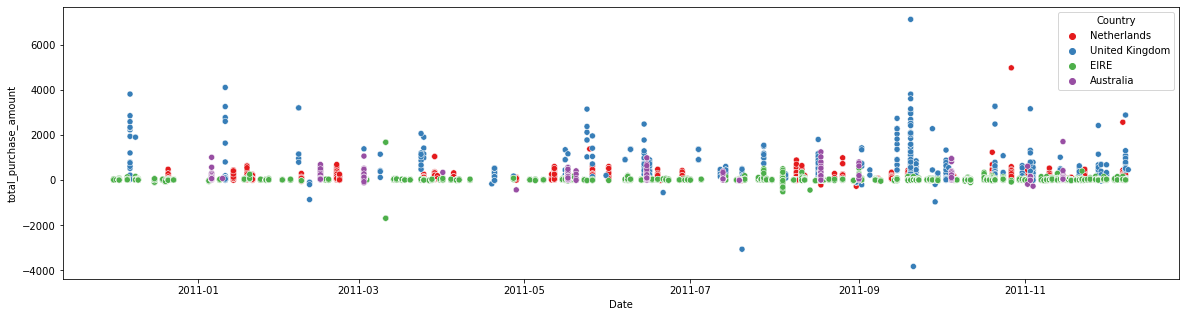

In [58]:
plt.figure(figsize = (20,5))
sns.scatterplot(x = 'Date', y = 'total_purchase_amount',hue='Country',data = Top_Data,palette="Set1")

In [59]:
# bottom_joined_data

<AxesSubplot:xlabel='Date', ylabel='total_purchase_amount'>

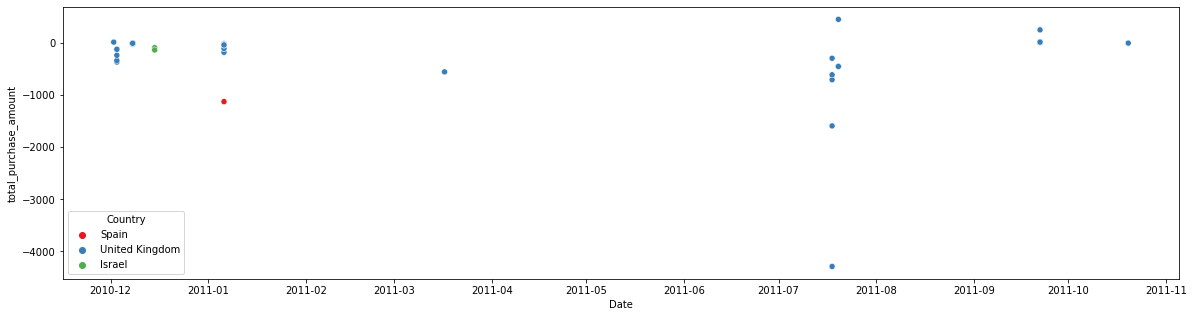

In [60]:
plt.figure(figsize = (20,5))
sns.scatterplot(x = 'Date', y = 'total_purchase_amount',hue='Country',data = bottom_joined_data,palette="Set1")

In [61]:
# Checking the Time of Purchasing done by top best selling stores and least selling stores

<AxesSubplot:xlabel='Time', ylabel='total_purchase_amount'>

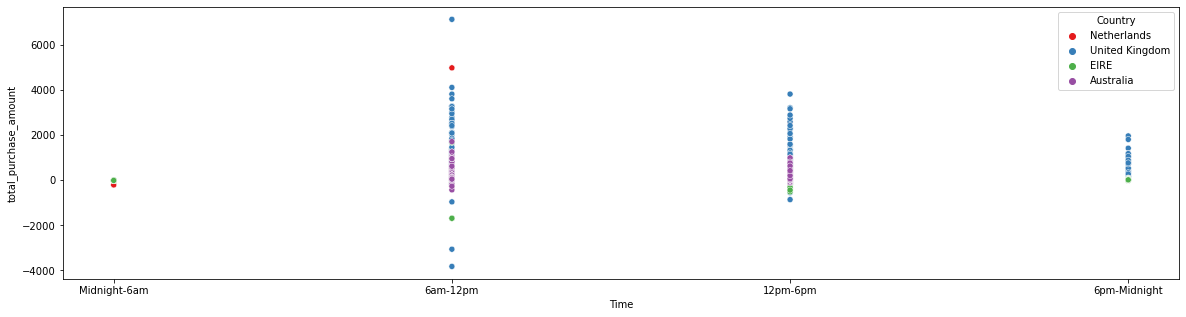

In [62]:
plt.figure(figsize = (20,5))
sns.scatterplot(x = 'Time', y = 'total_purchase_amount',hue='Country',data = Top_Data,palette="Set1")

<AxesSubplot:xlabel='Time', ylabel='total_purchase_amount'>

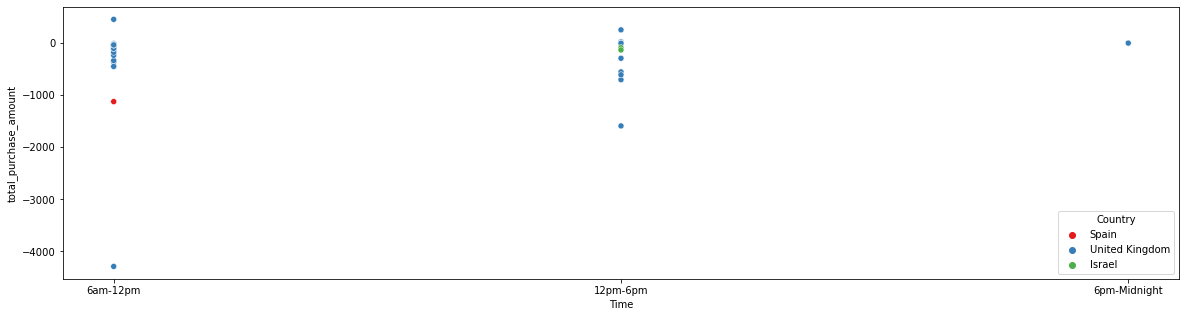

In [63]:
plt.figure(figsize = (20,5))
sns.scatterplot(x = 'Time', y = 'total_purchase_amount',hue='Country',data = bottom_joined_data,palette="Set1")

In [64]:
Analyzing the purchase frequency of customers: This will give insights into how often customers make purchases,
which can be used to predict future purchases and tailor the marketing strategy. so for this we will be using the entire
dataset

SyntaxError: invalid syntax (1849829654.py, line 1)

In [65]:
df1.index = df1["Date"]

In [66]:
df1

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,total_purchase_amount
Date,,,,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,6am-12pm,15.30
2010-12-01,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,6am-12pm,20.34
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,6am-12pm,22.00
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,6am-12pm,20.34
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,6am-12pm,20.34
...,...,...,...,...,...,...,...,...,...,...
2011-12-09,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,6am-12pm,10.20
2011-12-09,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,6am-12pm,12.60
2011-12-09,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,6am-12pm,16.60


<AxesSubplot:xlabel='Date'>

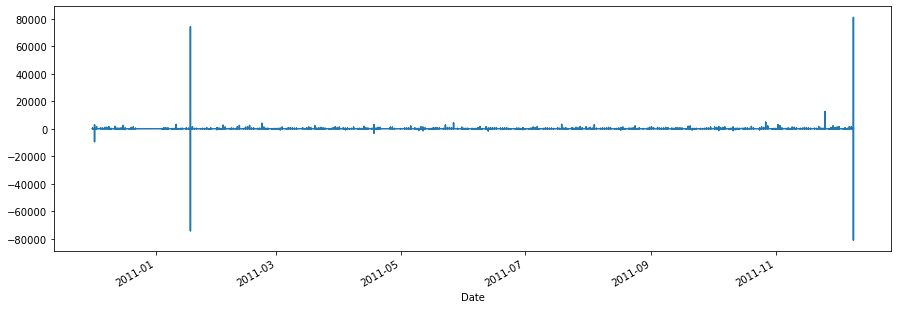

In [67]:
plt.figure(figsize = (15,5))
df1["Quantity"].plot()

In [68]:
# from the above data we can see that starting of evey year there is a huge reqirment of materials 

In [69]:
# Now lets check the corelation between each features

<AxesSubplot:>

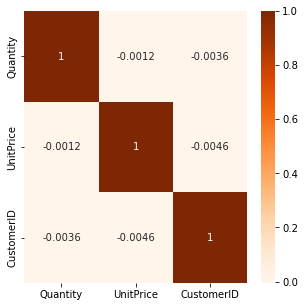

In [70]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(),annot = True,cmap = "Oranges")

In [71]:
# when we check the corralation graph we are unable to obtain any usfull insights so we are ignoring this 

In [72]:
# Model Selection

In [73]:
df1.index = df.index

In [74]:
df1

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,total_purchase_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,6am-12pm,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,6am-12pm,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,6am-12pm,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,6am-12pm,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,6am-12pm,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,6am-12pm,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,6am-12pm,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,6am-12pm,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,6am-12pm,16.60


In [75]:
# K-Means Clustering: This involves grouping customers based on their spending patterns and frequency of purchases.


In [76]:
# Droping Unwanted Columns

In [77]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,total_purchase_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,6am-12pm,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,6am-12pm,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,6am-12pm,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,6am-12pm,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,6am-12pm,20.34


In [78]:
df1 = df1.drop(columns = ["Date","total_purchase_amount",])

In [79]:
df1

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,6am-12pm
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,6am-12pm
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,6am-12pm
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,6am-12pm
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,6am-12pm
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,6am-12pm
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,6am-12pm
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,6am-12pm
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,6am-12pm


In [80]:
# Now we have droped Date columns and  Total Purchase column 

In [81]:
col = list(df1.columns)

In [82]:
# Now we are going to perform label encoding to all our object type dataset

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
label_encoder= LabelEncoder()

In [85]:
for i in col:
    if df1[i].dtype == "object":
        df1[i] = label_encoder.fit_transform(df1[i])

In [86]:
for i in col:
    if df1[i].dtype == "category":
        df1[i] = label_encoder.fit_transform(df1[i])

In [87]:
df1

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time
0,0,3249,3716,6,2.55,17850.0,35,1
1,0,2649,3724,6,3.39,17850.0,35,1
2,0,2855,861,8,2.75,17850.0,35,1
3,0,2803,1813,6,3.39,17850.0,35,1
4,0,2802,2776,6,3.39,17850.0,35,1
...,...,...,...,...,...,...,...,...
541904,18535,1470,2263,12,0.85,12680.0,13,1
541905,18535,1746,695,6,2.10,12680.0,13,1
541906,18535,2086,701,4,4.15,12680.0,13,1
541907,18535,2087,700,4,4.15,12680.0,13,1


In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  int32  
 1   StockCode    406829 non-null  int32  
 2   Description  406829 non-null  int32  
 3   Quantity     406829 non-null  int64  
 4   UnitPrice    406829 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      406829 non-null  int32  
 7   Time         406829 non-null  int32  
dtypes: float64(2), int32(5), int64(1)
memory usage: 20.2 MB


In [89]:
# Now lets scale our data

In [90]:
import sklearn
from sklearn.preprocessing import StandardScaler


In [91]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
df_scaled

array([[-1.7922161 ,  1.98535093,  1.55283192, ...,  1.49528019,
         0.32236414,  0.96008138],
       [-1.7922161 ,  1.27449556,  1.56017693, ...,  1.49528019,
         0.32236414,  0.96008138],
       [-1.7922161 ,  1.51855591, -1.06841568, ...,  1.49528019,
         0.32236414,  0.96008138],
       ...,
       [ 1.54604672,  0.60747627, -1.21531572, ..., -1.52176314,
        -2.94243012,  0.96008138],
       [ 1.54604672,  0.60866103, -1.21623385, ..., -1.52176314,
        -2.94243012,  0.96008138],
       [ 1.54604672, -0.63296636, -1.61010958, ..., -1.52176314,
        -2.94243012,  0.96008138]])

In [92]:
col = list(df1.columns)

In [93]:
df2 = pd.DataFrame(df_scaled,columns = [col])
df2.head(4)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time
0,-1.792216,1.985351,1.552832,-0.024373,-0.013135,1.49528,0.322364,0.960081
1,-1.792216,1.274496,1.560177,-0.024373,-0.001017,1.49528,0.322364,0.960081
2,-1.792216,1.518556,-1.068416,-0.016331,-0.010250,1.49528,0.322364,0.960081
3,-1.792216,1.456948,-0.194360,-0.024373,-0.001017,1.49528,0.322364,0.960081


In [94]:
from sklearn.cluster import KMeans

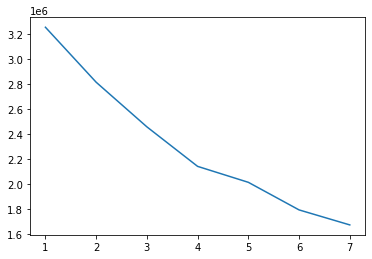

In [95]:
# Elbow curve method to find the ideal number of clusters.
#ssd - Wcss(Within cluster sum of square)
#ssd(Sum of Squared distance)

cluster = list(range(1,8))
ssd = []

for num_clusters in cluster:
    model_clus = KMeans(n_clusters = num_clusters,max_iter =150,random_state = 50)
    model_clus.fit(df2)
    ssd.append(model_clus.inertia_)

plt.plot(cluster,ssd)

In [96]:
# so here we if we are confused between which bend to take, always take the big number that
# so here we take 6
# FROM THE ABOVE GRAPH WE ARE INFERREING THAT OPTIMAL NUMBER OF K = 6 CLUSTERS

In [97]:
# So from Kmeans we got 6 clusters

In [100]:
cluster = KMeans(n_clusters = 6,max_iter = 150,random_state = 15)
cluster.fit(df2)

KMeans(max_iter=150, n_clusters=6, random_state=15)

In [101]:
cluster.labels_


array([0, 2, 0, ..., 3, 3, 3])

In [102]:
df["Cluster_Id"] = cluster.labels_

In [103]:
# calculate the total purchase amount per customer
df['total_purchase_amount'] = df['Quantity'] * df['UnitPrice']

In [104]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Cluster_Id,total_purchase_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,12/1/2010,6am-12pm,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,12/1/2010,6am-12pm,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,12/1/2010,6am-12pm,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,12/1/2010,6am-12pm,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,12/1/2010,6am-12pm,0,20.34


In [105]:
df["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64

In [106]:
df = df.drop(columns = ["Date"])

In [107]:
df["Cluster_Id"].value_counts()

1    137173
0    126430
2    108206
3     35017
5         2
4         1
Name: Cluster_Id, dtype: int64

In [108]:
# Now lets plot the scatter plot

<AxesSubplot:xlabel='Time', ylabel='Quantity'>

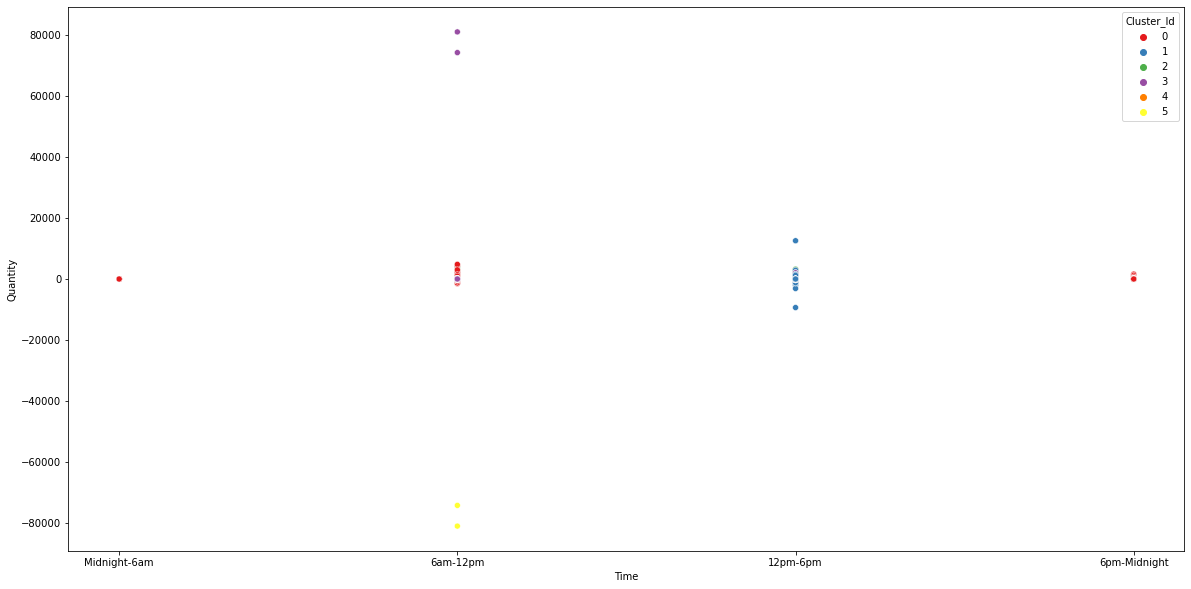

In [109]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'Time', y = "Quantity",hue='Cluster_Id',data = df,palette="Set1")

<AxesSubplot:xlabel='Time', ylabel='total_purchase_amount'>

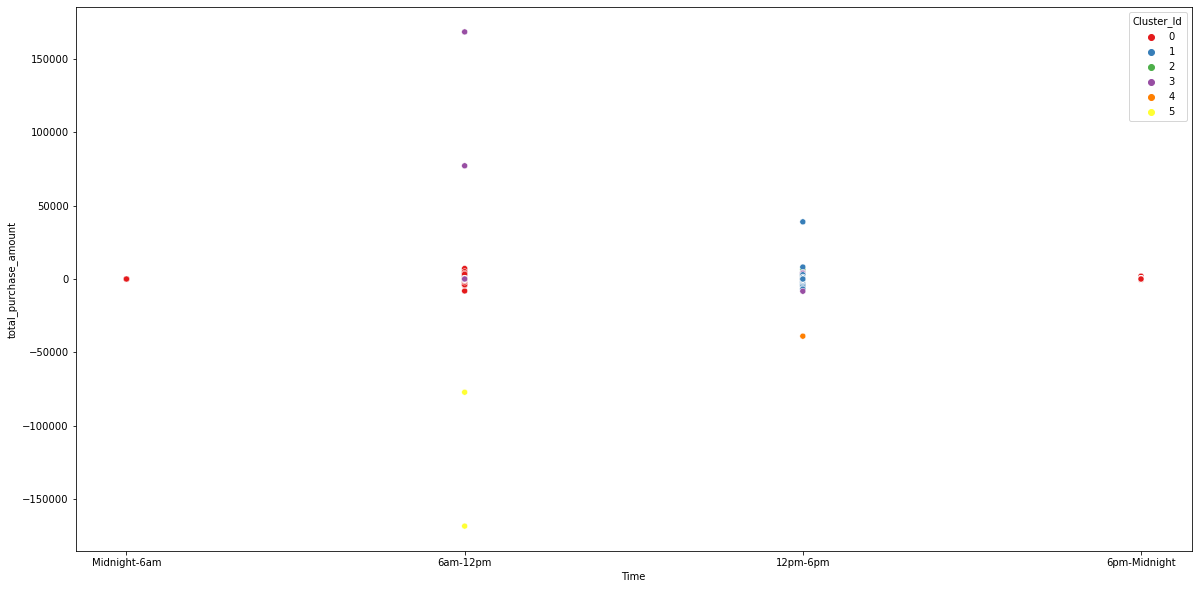

In [110]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'Time', y = "total_purchase_amount",hue='Cluster_Id',data = df,palette="Set1")

In [111]:
# lets check each cluters and their specialities

In [112]:
len(df["Country"].value_counts())

37

In [113]:
A = df[df["Cluster_Id"]==0].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False))
df[df["Cluster_Id"]==0].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False)).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Cluster_Id,total_purchase_amount
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,0.21,12901.0,United Kingdom,6am-12pm,0,1008.00
206121,554868,22197,SMALL POPCORN HOLDER,4300,0.72,13135.0,United Kingdom,6am-12pm,0,3096.00
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,0.32,16308.0,United Kingdom,6am-12pm,0,960.00
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,0.21,16333.0,United Kingdom,6am-12pm,0,544.32
421601,573003,23084,RABBIT NIGHT LIGHT,2400,2.08,14646.0,Netherlands,6am-12pm,0,4992.00


In [114]:
A["Country"].value_counts()

United Kingdom          122806
Switzerland                960
Netherlands                873
Portugal                   644
Spain                      558
Sweden                     162
Poland                     103
Singapore                   90
USA                         67
Malta                       59
RSA                         58
Norway                      20
Unspecified                 19
United Arab Emirates        10
Saudi Arabia                 1
Name: Country, dtype: int64

In [115]:
len(A["Country"].value_counts())

15

In [116]:
A["Time"].value_counts()

6am-12pm        122349
6pm-Midnight      4053
Midnight-6am        28
12pm-6pm             0
Name: Time, dtype: int64

In [117]:
A["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    1014
JUMBO BAG RED RETROSPOT                852
PARTY BUNTING                          713
ASSORTED COLOUR BIRD ORNAMENT          696
SPOTTY BUNTING                         493
                                      ... 
WHITE WIRE PLANT POT HOLDER              1
TURQUOISE HEART OF GLASS BRACELET        1
RETRO PILL BOX , REVOLUTIONARY           1
5 STRAND GLASS NECKLACE AMETHYST         1
ASSORTED TUTTI FRUTTI ROUND BOX          1
Name: Description, Length: 3446, dtype: int64

In [118]:
len(df["Description"].unique())

3896

In [119]:
len(A["Description"].value_counts())

3446

In [120]:
In clusterid = 0 we can see that most of the customers are from United Kingdom followed by Switzerland, Netherlands,
Portugal,Spain and the least we can see in UAE and Saudi Arabia. And the cutomers from this cluster make most of their 
purchases at 6am-12pm and 6pm-Midnight and least at Midnight-6am and their are no customers shopping at 12pm-6pm.

The products which they are purchasing most are

WHITE HANGING HEART T-LIGHT HOLDER,
JUMBO BAG RED RETROSPOT
PARTY BUNTING
ASSORTED COLOUR BIRD ORNAMENT
SPOTTY BUNTING

And the products which they are least purchased are:
    
WHITE WIRE PLANT POT HOLDER
TURQUOISE HEART OF GLASS BRACELET 
RETRO PILL BOX , REVOLUTIONARY 
5 STRAND GLASS NECKLACE AMETHYST
ASSORTED TUTTI FRUTTI ROUND BOX 

And out of 3896 Unique Products these group of consumers purchase 3446 of the products that is almost 88% of the 
total products are consumed by this perticular group.

And here we totaly we have participation of 37 countries. So here we have consumers from 15 countries in buying 
these products that is above products are nedded by almost 40% out of total countries 

SyntaxError: invalid syntax (990901056.py, line 1)

In [121]:
B =df[df["Cluster_Id"]==1].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False))
df[df["Cluster_Id"]==1].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False)).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Cluster_Id,total_purchase_amount
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,0.00,13256.0,United Kingdom,12pm-6pm,1,0.0
291249,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,1.45,12931.0,United Kingdom,12pm-6pm,1,4176.0
437480,574294,21915,RED HARMONICA IN BOX,2100,1.06,16333.0,United Kingdom,12pm-6pm,1,2226.0
160542,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2.40,15749.0,United Kingdom,12pm-6pm,1,4632.0
291247,562439,22197,POPCORN HOLDER,1900,0.72,12931.0,United Kingdom,12pm-6pm,1,1368.0


In [122]:
B["Country"].value_counts()

United Kingdom          133878
Spain                     1139
Netherlands                490
Portugal                   419
Switzerland                409
USA                        213
Sweden                     172
Unspecified                172
Norway                     125
Malta                       51
Singapore                   47
United Arab Emirates        37
Poland                      21
Name: Country, dtype: int64

In [123]:
len(B["Country"].value_counts())

13

In [124]:
B["Time"].value_counts()

12pm-6pm        137173
Midnight-6am         0
6am-12pm             0
6pm-Midnight         0
Name: Time, dtype: int64

In [125]:
B["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    987
JUMBO BAG RED RETROSPOT               691
ASSORTED COLOUR BIRD ORNAMENT         671
PARTY BUNTING                         617
SPOTTY BUNTING                        464
                                     ... 
5 STRAND GLASS NECKLACE BLACK           1
WALL ART , THE MAGIC FOREST             1
SMALL KITCHEN FLOWER POTS PLAQUE        1
PACK OF 12 DOILEY TISSUES               1
VINTAGE BILLBOARD TEA MUG               1
Name: Description, Length: 3502, dtype: int64

In [126]:
len(B["Description"].value_counts())

3502

In [127]:
In clusterid = 1 we can see that most of the customers are from United Kingdom followed by Spain, Netherlands,
Portugal,Switzerland and the least we can see in UAE and Poland. And the cutomers from this cluster make all of their 
purchases at 12pm-6pm
The products which they are purchasing most are

WHITE HANGING HEART T-LIGHT HOLDER,
JUMBO BAG RED RETROSPOT
PARTY BUNTING
ASSORTED COLOUR BIRD ORNAMENT
SPOTTY BUNTING

And the products which they are least purchased are:
    
VINTAGE BILLBOARD TEA MUG 
WALL ART , THE MAGIC FOREST
SMALL KITCHEN FLOWER POTS PLAQUE 
5 STRAND GLASS NECKLACE AMETHYST
PACK OF 12 DOILEY TISSUES  

And out of 3896 Unique Products these group of consumers purchase 3502 of the products that is almost 90% of the 
total products are consumed by this perticular group.

And here we totaly we have participation of 37 countries. So here we have consumers from 13 countries in buying 
these products that is above products are nedded by almost 35% out of total countries 

SyntaxError: invalid syntax (1628864144.py, line 1)

In [128]:
C = df[df["Cluster_Id"]==2].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False))
df[df["Cluster_Id"]==2].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False)).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Cluster_Id,total_purchase_amount
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,0.82,18087.0,United Kingdom,6am-12pm,2,3202.92
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,0.06,14609.0,United Kingdom,12pm-6pm,2,191.16
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,15749.0,United Kingdom,6am-12pm,2,6539.40
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,15749.0,United Kingdom,12pm-6pm,2,6539.40
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,0.18,16754.0,United Kingdom,12pm-6pm,2,518.40


In [129]:
C["Country"].value_counts()

United Kingdom          105189
Spain                      836
Netherlands                701
Switzerland                508
Portugal                   403
Sweden                     128
Norway                     125
Singapore                   92
Poland                      80
Unspecified                 53
Lithuania                   33
United Arab Emirates        21
Malta                       17
USA                         11
Saudi Arabia                 9
Name: Country, dtype: int64

In [130]:
len(C["Country"].value_counts())

15

In [131]:
C["Time"].value_counts()

12pm-6pm        56064
6am-12pm        51976
6pm-Midnight      166
Midnight-6am        0
Name: Time, dtype: int64

In [132]:
C["Description"].value_counts()

LUNCH BAG RED RETROSPOT               868
LUNCH BAG  BLACK SKULL.               712
REGENCY CAKESTAND 3 TIER              699
LUNCH BAG CARS BLUE                   672
PACK OF 72 RETROSPOT CAKE CASES       619
                                     ... 
BAG OF SILVER STONES                    1
FOLK ART METAL STAR T-LIGHT HOLDER      1
TEA TIME TEA SET IN GIFT BOX            1
GREEN  DIAMANTE PEN IN GIFT BOX         1
BLUE VICTORIAN FABRIC OVAL BOX          1
Name: Description, Length: 2179, dtype: int64

In [133]:
len(C["Description"].value_counts())

2179

In [134]:
In clusterid = 2 we can see that most of the customers are from United Kingdom followed by Spain, Netherlands,
Portugal,Switzerland and the least we can see in USA and Saudi Arabia. And the cutomers from this cluster make all of their 
purchases at 12pm-6pm and 6am-12pm and least are made on 6pm-Midnight and no purchases are made on Midnight-6am
The products which  are purchased most:

LUNCH BAG RED RETROSPOT 
LUNCH BAG  BLACK SKULL.
REGENCY CAKESTAND 3 TIER
LUNCH BAG CARS BLUE
PACK OF 72 RETROSPOT CAKE CASES

products which  are least purchased :
    
BAG OF SILVER STONES
FOLK ART METAL STAR T-LIGHT HOLDER
TEA TIME TEA SET IN GIFT BOX  
GREEN  DIAMANTE PEN IN GIFT BOX
BLUE VICTORIAN FABRIC OVAL BOX

And out of 3896 Unique Products these group of consumers purchase 2179 of the products that is almost 55% of the 
total products are consumed by this perticular group.

And here we totaly we have participation of 37 countries. So here we have consumers from 15 countries in buying 
these products that is above products are nedded by almost 40% out of total countries 

SyntaxError: invalid syntax (1166225342.py, line 1)

In [135]:
D  = df[df["Cluster_Id"]==3].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False))
df[df["Cluster_Id"]==3].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False)).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Cluster_Id,total_purchase_amount
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,United Kingdom,6am-12pm,3,168469.6
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,12346.0,United Kingdom,6am-12pm,3,77183.6
511421,579498,23084,RABBIT NIGHT LIGHT,2040,1.79,12798.0,Japan,12pm-6pm,3,3651.6
19871,537899,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,2.55,12755.0,Japan,6am-12pm,3,3794.4
6365,536890,17084R,ASSORTED INCENSE PACK,1440,0.16,14156.0,EIRE,6am-12pm,3,230.4


In [136]:
len(D["Country"].value_counts())

27

In [137]:
D["Time"].value_counts()

6am-12pm        19854
12pm-6pm        14987
6pm-Midnight      163
Midnight-6am       13
Name: Time, dtype: int64

In [138]:
D["Description"].value_counts()

POSTAGE                                913
REGENCY CAKESTAND 3 TIER               274
ROUND SNACK BOXES SET OF4 WOODLAND     256
PLASTERS IN TIN WOODLAND ANIMALS       170
PLASTERS IN TIN CIRCUS PARADE          166
                                      ... 
RED BOUDICCA LARGE BRACELET              1
ANT COPPER TURQ BOUDICCA BRACELET        1
IVORY WICKER HEART SMALL                 1
MISELTOE HEART WREATH                    1
PINK POODLE HANGING DECORATION           1
Name: Description, Length: 2775, dtype: int64

In [139]:
len(D["Description"].value_counts())

2775

In [140]:
In clusterid = 3 we can see that most of the customers are from Germany followed by France, EIRE,
Belgium,Australia and the least we can see in United Kingdom,Portugal,Bahrain and Lithuania.
And the cutomers from this cluster make all of their purchases at 6am-12pm and 12pm-6pm and least
are made on 6pm-Midnight and Midnight-6am

The products which  are purchased most:

POSTAGE                                 
REGENCY CAKESTAND 3 TIER   
ROUND SNACK BOXES SET OF4 WOODLAND
PLASTERS IN TIN WOODLAND ANIMALS 
PLASTERS IN TIN CIRCUS PARADE

products which  are least purchased :
    
RED BOUDICCA LARGE BRACELET 
ANT COPPER TURQ BOUDICCA BRACELET
IVORY WICKER HEART SMALL   
MISELTOE HEART WREATH
PINK POODLE HANGING DECORATION 

And out of 3896 Unique Products these group of consumers purchase 2775 of the products that is almost 71% of the 
total products are consumed by this perticular group.

And here  we have participation of 37 countries. So here we have consumers from 27 countries in buying 
these products that is above products are nedded by almost 73% out of total countries

SyntaxError: invalid syntax (2372908626.py, line 1)

In [141]:
E = df[df["Cluster_Id"]==4].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False))
df[df["Cluster_Id"]==4].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False)).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Cluster_Id,total_purchase_amount
222681,C556445,M,Manual,-1,38970.0,15098.0,United Kingdom,12pm-6pm,4,-38970.0


In [142]:
E["Country"].value_counts()

United Kingdom    1
Name: Country, dtype: int64

In [143]:
E["Time"].value_counts()

12pm-6pm        1
Midnight-6am    0
6am-12pm        0
6pm-Midnight    0
Name: Time, dtype: int64

In [144]:
E["Description"].value_counts()

Manual    1
Name: Description, dtype: int64

In [145]:
len(E["Description"].value_counts())

1

In [146]:
In clusterid = 4 we can see that there is only 1 return of purchased item and its done in United Kingdom around 12pm-6pm 


SyntaxError: invalid syntax (3329115519.py, line 1)

In [147]:
F = df[df["Cluster_Id"]==5].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False))
df[df["Cluster_Id"]==5].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False)).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Cluster_Id,total_purchase_amount
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1.04,12346.0,United Kingdom,6am-12pm,5,-77183.6
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2.08,16446.0,United Kingdom,6am-12pm,5,-168469.6


In [148]:
F["Country"].value_counts()

United Kingdom    2
Name: Country, dtype: int64

In [149]:
F["Time"].value_counts()

6am-12pm        2
Midnight-6am    0
12pm-6pm        0
6pm-Midnight    0
Name: Time, dtype: int64

In [150]:
F["Description"].value_counts()

MEDIUM CERAMIC TOP STORAGE JAR    1
PAPER CRAFT , LITTLE BIRDIE       1
Name: Description, dtype: int64

In [151]:
In clusterid = 5 we can see that 2 items are returned in United Kingdom around 6am-12pm
and the returned items are as follows 

MEDIUM CERAMIC TOP STORAGE JAR
PAPER CRAFT , LITTLE BIRDIE

SyntaxError: invalid syntax (928909913.py, line 1)

In [152]:
# identifying the rows with negative values in the Quantity column
negative_rows = df[df['Quantity'] < 0]

In [153]:
negative_rows

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Cluster_Id,total_purchase_amount
141,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,6am-12pm,0,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,6am-12pm,0,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,6am-12pm,0,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,6am-12pm,0,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,6am-12pm,0,-6.96
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83,14397.0,United Kingdom,6am-12pm,0,-9.13
541541,C581499,M,Manual,-1,224.69,15498.0,United Kingdom,6am-12pm,0,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,15311.0,United Kingdom,6am-12pm,0,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25,17315.0,United Kingdom,6am-12pm,0,-1.25


In [154]:
negative_rows['Cluster_Id'].value_counts()

1    4112
0    3694
3    1096
5       2
4       1
Name: Cluster_Id, dtype: int64

In [155]:
# Here we can see that most of the products which has been returned are form cluster_id 1 followed by 0  and 3 
# and we have the lest number of retured products in cluster id 5 and 4.
# and there are no return of products made in cluster id 2

# so now lest check this in breaf

In [156]:
NA = negative_rows[negative_rows["Cluster_Id"]==0].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False))
negative_rows[negative_rows["Cluster_Id"]==0].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False)).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Cluster_Id,total_purchase_amount
173277,C551685,POST,POSTAGE,-1,8142.75,16029.0,United Kingdom,6am-12pm,0,-8142.75
268027,C560372,M,Manual,-1,4287.63,17448.0,United Kingdom,6am-12pm,0,-4287.63
406404,C571750,M,Manual,-1,3949.32,12744.0,Singapore,6am-12pm,0,-3949.32
293842,C562647,M,Manual,-1,3155.95,15502.0,United Kingdom,6am-12pm,0,-3155.95
271151,C560647,M,Manual,-1,3060.60,18102.0,United Kingdom,6am-12pm,0,-3060.60


In [157]:
len(NA)

3694

In [158]:
NA["Country"].value_counts()

United Kingdom    3615
Switzerland         18
Spain               15
USA                 11
Portugal            10
Malta                8
Netherlands          7
Poland               5
Singapore            2
Sweden               2
Saudi Arabia         1
Name: Country, dtype: int64

In [159]:
NA["Time"].value_counts()

6am-12pm        3421
6pm-Midnight     246
Midnight-6am      27
12pm-6pm           0
Name: Time, dtype: int64

In [160]:
NA["Description"].value_counts()

Manual                                 77
REGENCY CAKESTAND 3 TIER               71
Discount                               50
POSTAGE                                46
JAM MAKING SET WITH JARS               39
                                       ..
DECORATIVE PLANT POT WITH FRIEZE        1
WHITE BEADED GARLAND STRING 20LIGHT     1
VINTAGE KEEPSAKE BOX PINK FLOWER        1
VINTAGE UNION JACK DOORSTOP             1
MIRROR MOSAIC T-LIGHT HOLDER            1
Name: Description, Length: 1295, dtype: int64

In [161]:
len(NA["Description"].value_counts())

1295

In [162]:
In cluster 0 we can see that most of the products are returned in UK followed by Switzerland and Spain 
and least returned are from Saudi Arabia and Sweden.

And most of them have returned at around 6am-12pm , 6pm-Midnight and least returned at the time of Midnight-6am
and no return has been made on 12pm-6pm 

And most of the product which has been returned are 
REGENCY CAKESTAND 3 TIER 
Discount
POSTAGE
JAM MAKING SET WITH JARS

And least  products which has been returned are 

DECORATIVE PLANT POT WITH FRIEZE 
WHITE BEADED GARLAND STRING 20LIGHT 
VINTAGE KEEPSAKE BOX PINK FLOWER 
VINTAGE UNION JACK DOORSTOP
MIRROR MOSAIC T-LIGHT HOLDER



SyntaxError: invalid syntax (3763858472.py, line 1)

In [163]:
NB = negative_rows[negative_rows["Cluster_Id"]==1].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False))
negative_rows[negative_rows["Cluster_Id"]==1].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False)).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Cluster_Id,total_purchase_amount
173391,C551699,M,Manual,-1,6930.00,16029.0,United Kingdom,12pm-6pm,1,-6930.00
144831,C548830,M,Manual,-1,2382.92,12744.0,Singapore,12pm-6pm,1,-2382.92
144834,C548834,M,Manual,-1,2053.07,12744.0,Singapore,12pm-6pm,1,-2053.07
150591,C549452,D,Discount,-1,1867.86,17940.0,United Kingdom,12pm-6pm,1,-1867.86
342996,C566925,M,Manual,-1,1829.84,12748.0,United Kingdom,12pm-6pm,1,-1829.84


In [164]:
len(NB)

4112

In [165]:
NB["Country"].value_counts()

United Kingdom    3915
USA                101
Spain               33
Switzerland         17
Norway              11
Sweden               9
Portugal             8
Malta                7
Poland               6
Singapore            5
Name: Country, dtype: int64

In [166]:
NB["Time"].value_counts()

12pm-6pm        4112
Midnight-6am       0
6am-12pm           0
6pm-Midnight       0
Name: Time, dtype: int64

In [167]:
NB["Description"].value_counts()

REGENCY CAKESTAND 3 TIER               81
Manual                                 77
JAM MAKING SET WITH JARS               33
WOOD 2 DRAWER CABINET WHITE FINISH     31
SET OF 3 CAKE TINS PANTRY DESIGN       29
                                       ..
HOT STUFF HOT WATER BOTTLE              1
AFGHAN SLIPPER SOCK PAIR                1
SET/4 MODERN VINTAGE COTTON NAPKINS     1
RED CHARLIE+LOLA PERSONAL DOORSIGN      1
VINTAGE BILLBOARD TEA MUG               1
Name: Description, Length: 1381, dtype: int64

In [168]:
len(NB["Description"].value_counts())

1381

In [169]:
In cluster 1 we can see that most of the products are returned in UK followed by USA and Spain 
and least returned are from Singapore and Poland.

And all of them have returned at around 12pm-6pm.

And most of the product which has been returned are 
REGENCY CAKESTAND 3 TIER 
JAM MAKING SET WITH JARS 
WOOD 2 DRAWER CABINET WHITE FINISH 
SET OF 3 CAKE TINS PANTRY DESIGN 

And least  products which has been returned are 

HOT STUFF HOT WATER BOTTLE
AFGHAN SLIPPER SOCK PAIR  
SET/4 MODERN VINTAGE COTTON NAPKINS
RED CHARLIE+LOLA PERSONAL DOORSIGN
VINTAGE BILLBOARD TEA MUG 


SyntaxError: invalid syntax (492249601.py, line 1)

In [170]:
NC = negative_rows[negative_rows["Cluster_Id"]==3].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False))
negative_rows[negative_rows["Cluster_Id"]==3].sort_values(by = ["Quantity","UnitPrice"],ascending = (False,False)).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Time,Cluster_Id,total_purchase_amount
117052,C546325,M,Manual,-1,1687.17,14911.0,EIRE,6am-12pm,3,-1687.17
117053,C546327,M,Manual,-1,1687.17,14911.0,EIRE,6am-12pm,3,-1687.17
145832,C548914,M,Manual,-1,1136.30,12669.0,France,6am-12pm,3,-1136.30
297369,C562938,M,Manual,-1,1121.18,14156.0,EIRE,12pm-6pm,3,-1121.18
398147,C571220,M,Manual,-1,599.50,13810.0,Germany,12pm-6pm,3,-599.50


In [171]:
len(NC)

1096

In [172]:
NC["Country"].value_counts()

Germany               453
EIRE                  247
France                149
Australia              74
Italy                  45
Belgium                38
Japan                  37
Channel Islands        10
Finland                10
Denmark                 9
Cyprus                  8
Czech Republic          5
Austria                 3
Norway                  3
Israel                  2
Greece                  1
European Community      1
Netherlands             1
Name: Country, dtype: int64

In [173]:
NC["Time"].value_counts()

6am-12pm        583
12pm-6pm        488
Midnight-6am     13
6pm-Midnight     12
Name: Time, dtype: int64

In [174]:
NB["Description"].value_counts()

REGENCY CAKESTAND 3 TIER               81
Manual                                 77
JAM MAKING SET WITH JARS               33
WOOD 2 DRAWER CABINET WHITE FINISH     31
SET OF 3 CAKE TINS PANTRY DESIGN       29
                                       ..
HOT STUFF HOT WATER BOTTLE              1
AFGHAN SLIPPER SOCK PAIR                1
SET/4 MODERN VINTAGE COTTON NAPKINS     1
RED CHARLIE+LOLA PERSONAL DOORSIGN      1
VINTAGE BILLBOARD TEA MUG               1
Name: Description, Length: 1381, dtype: int64

In [175]:
len(NB["Description"].value_counts())

1381

In cluster 3 we can see that most of the products are returned in Germany  followed by EIRE and France 
and least returned are from Netherlands and European Community.

And most of them have returned at around 6am-12pm,12pm-6pm and least returned at the time of Midnight-6am and 6pm-Midnight .

And most of the product which has been returned are 
REGENCY CAKESTAND 3 TIER 
JAM MAKING SET WITH JARS 
WOOD 2 DRAWER CABINET WHITE FINISH 
SET OF 3 CAKE TINS PANTRY DESIGN 

And least  products which has been returned are 

HOT STUFF HOT WATER BOTTLE
AFGHAN SLIPPER SOCK PAIR  
SET/4 MODERN VINTAGE COTTON NAPKINS
RED CHARLIE+LOLA PERSONAL DOORSIGN
VINTAGE BILLBOARD TEA MUG 